# Homework w06d01


### Read in the Wisconsin Breast Cancer Dataset

### Assign the columns

The attributes below will be the columns of the dataset.
  
Attribute                     

1. Sample code number [subject ID]
1. Class
1. Cell nucleus mean radius
1. Cell nucleus SE radius
1. Cell nucleus worst radius
1. Texture mean
1. Texture SE
1. Texture worst
1. Perimeter mean
1. Perimeter SE
1. Perimeter worst
1. Area mean
1. Area SE
1. Area worst
1. Smoothness mean
1. Smoothness SE
1. Smoothness worst
1. Compactness mean
1. Compactness SE
1. Compactness worst
1. Concavity mean
1. Concavity SE
1. Concavity worst
1. Concave points mean
1. Concave points SE
1. Concave points worst
1. Symmetry mean
1. Symmetry SE
1. Symmetry worst
1. Fractal dimension mean
1. Fractal dimension SE
1. Fractal dimension worst

The column names are taken from the dataset info file.
For more information check out the information file: wdbc.names.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score, precision_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

df.columns = column_names

# Define the feature matrix X
X = df.iloc[:,2:]

#Define the response y and recode it numerically
y = df.malignant
y = y.map(lambda x: 0 if x == "B" else 1)
print y.head()
X.head()

0    1
1    1
2    1
3    1
4    1
Name: malignant, dtype: int64


,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 1. Use the standard scaler to transform the feature matrix X, put the output into a pandas data frame and assign the appropriate column names

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs)
Xs.columns = column_names[2:]

In [16]:
Xs.head()

,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=.3,random_state=42)

#### 2. Build a classification tree of depth 3 on the training set and determine the model accuracy, the confusion matrix and the classification report  on the test set

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Accuracy
acc = accuracy_score(y_test,y_pred)
# Confusion matrix
conmat = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(conmat, index=['is_benign', 'is_malignant'],columns=['predicted_benign', 'predicted_malignant'])
# Classification report
cls_rep = classification_report(y_test, y_pred)
# Print model scores
print(cls_rep)
print("Accuracy: %f" % acc)
confusion

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       108
          1       0.95      0.94      0.94        63

avg / total       0.96      0.96      0.96       171

Accuracy: 0.959064


,predicted_benign,predicted_malignant
is_benign,105,3
is_malignant,4,59


#### 3. Use the following function to create a png-file of the decision tree. Import the created png-file into the jupyter notebook by using 

In [27]:
from os import system
from sklearn.tree import export_graphviz
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,filled=True,
                    rounded=True,special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))  # comment out this line if you don't have GraphViz yet

In [28]:
build_tree_image(tree,'tree_bc.png')

#### Include your tree here
<img src='tree_bc.png' width= 80%>

#### 4. Use "feature_importances_" to obtain a rank list of the features according to their importance. Compare your results with the best subsetselection results based on logistic regression (homework w05d04).

In [112]:
# compute the feature importances
features = tree.feature_importances_
df_features = pd.DataFrame(features)
df_feat= pd.concat([df_features,pd.Series(X.columns.tolist())],axis=1)
df_feat.columns=['importance','name']
ordered_features = df_feat.sort_values('importance',ascending=False)
ordered_features[:6]

,importance,name
7,0.776270,perimeter_se
21,0.091314,concave_pts_mean
20,0.043482,concavity_worst
23,0.040310,concave_pts_worst
27,0.033708,fractal_dim_mean
13,0.014916,smoothness_se


In exercice w05d04 we found the following top 5 features:

['nucleus_worst', 'perimeter_se', 'concavity_worst', 'concave_pts_se', 'fractal_dim_mean']

There is some overlap, but it is not exactly the same set of features!

#### 5. Perform grid search with five-fold cross validation varying the maximal depth, the maximal number of leaf nodes and the minimum number of samples in each leaf. Obtain the ROC curve for the best model.

In [130]:
from sklearn.model_selection import GridSearchCV

#Grid Search
params={'max_depth':range(1,8),
    'max_leaf_nodes':range(3,15),
    'min_samples_leaf':range(1,6)}

gs = GridSearchCV(tree,params,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [131]:
#After completion, show the final best results and scores
gs.best_params_

{'max_depth': 5, 'max_leaf_nodes': 11, 'min_samples_leaf': 4}

In [134]:
gs_tree = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=11,min_samples_leaf=4)
gs_tree.fit(X_train,y_train)
y_pred = gs_tree.predict(X_test)

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
Y_score = gs_tree.decision_function(X_test)
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)
# Plot of a ROC curve for class 1 (has_cancer)
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()


AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

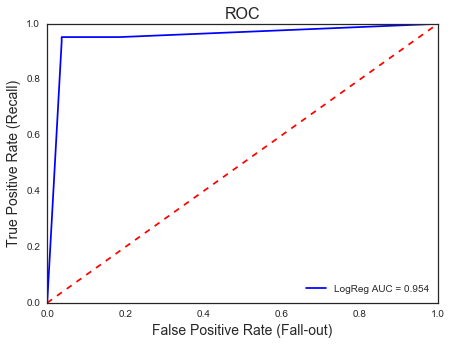

In [141]:
y_prob = gs_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

fig, ax = plt.subplots(figsize=(7,5))

plt.plot(false_positive_rate, true_positive_rate, 'b', label='LogReg AUC = %0.3f'% roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.title('ROC', fontsize=16)
plt.xlabel('False Positive Rate (Fall-out)', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.legend(loc='lower right')
plt.show()